In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import sys
from ema_workbench import (Model, CategoricalParameter,
                           ScalarOutcome, IntegerParameter, RealParameter, save_results, load_results)
from dike_model_function import DikeNetwork  # @UnresolvedImport
from ema_workbench import (Model, MultiprocessingEvaluator, Policy, Scenario)
from ema_workbench.em_framework.evaluators import perform_experiments
from ema_workbench.em_framework.evaluators import LHS, SOBOL, MORRIS
from ema_workbench.em_framework.optimization import EpsilonProgress, HyperVolume
from ema_workbench.em_framework.samplers import sample_uncertainties
from ema_workbench.analysis import feature_scoring, prim, dimensional_stacking, pairs_plotting
from ema_workbench.em_framework.salib_samplers import get_SALib_problem
import ema_workbench.em_framework.samplers
from SALib.analyze import sobol
from SALib.sample import saltelli, morris, fast_sampler
import SALib.util.results
from ema_workbench.analysis import regional_sa
from numpy.lib import recfunctions as rf
from ema_workbench.util import ema_logging
from funs_project import get_opti_policies
import time
from problem_formulation import get_model_for_problem_formulation
ema_logging.log_to_stderr(ema_logging.INFO)

<Logger EMA (DEBUG)>

In [2]:
actor = 'Deventer'
n_scen = 25

sobol_results = load_results('./results/extra_trees_sobol_' + str(n_scen) + '_' + actor + '.tar.gz')

[MainProcess/INFO] results loaded succesfully from C:\Users\David2\Documents\GitHub\FabiosDecisions\epa1361\final assignment\results\extra_trees_sobol_25_Deventer.tar.gz


[MainProcess/INFO] model dropped from analysis because only a single category


Starting feature scoring: Deventer


[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category


Feature scoring visualization saved: Deventer
Done!


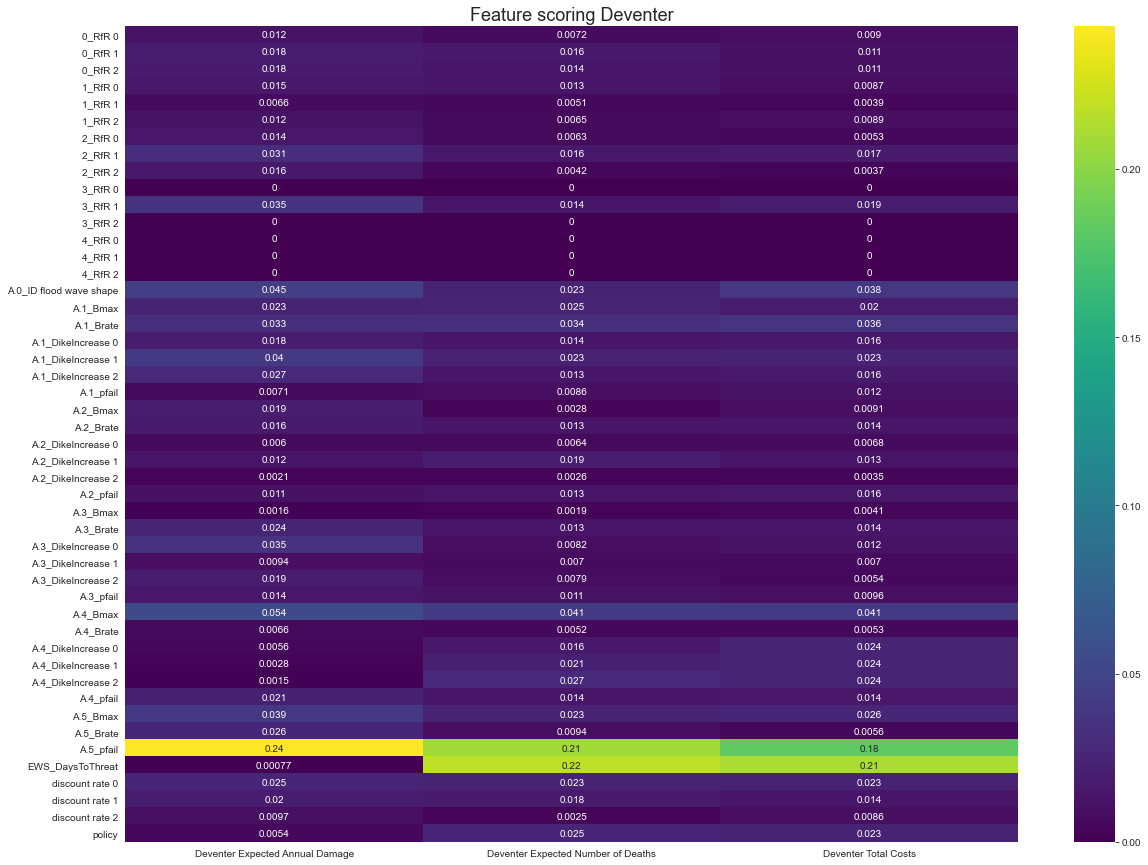

In [11]:
sobol_experiments, sobol_outcomes = sobol_results

x = sobol_experiments
y = sobol_outcomes

print('Starting feature scoring:', actor)

fs = feature_scoring.get_feature_scores_all(x, y, alg='extra trees')

# Set up figure
sns.set_style('white')
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(20, 15)

sns.heatmap(fs, cmap='viridis', annot=True, ax=ax)
ax.set_title('Feature scoring ' + actor, fontsize=18)

# Might wanna add to appendices, but better if we make our own visualisation to merge all the actors
# and show what each one is sensitive to
plt.savefig('../../report/figures/Feature_scoring_' + actor + '_' + str(n_scen) + 'scen.png')

print('Feature scoring visualization saved:', actor)

print('Done!')

plt.show()

In [10]:
pd.read_csv("../../report/figures/test.csv")

,a,b,c
0,1,2,3
